<a href="https://colab.research.google.com/github/dhiru-c/CAPSTONE_PROJECT-HOTEL-BOOKING-ANALYSIS/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

## **Importing Libraries**

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [95]:
# Defining path
url = 'https://drive.google.com/uc?id=1C9AxF9fcVzMw0Bgs0NaRrNML2WwX1Ehm'

# Importing dataset to create a dataframe
df = pd.read_csv(url)

## **Some Basic Checks**

In [96]:
# Checking shape pf dataframe
df.shape

(119390, 32)

In [97]:
# Checking top 5 records in dataframe
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [98]:
# Checking bottom 5 records in dataframe
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [100]:
#checking stastics
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [101]:
#Check all the coloumns present in our dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## **Missing Values Treatment**



In [102]:
# CHecking number of null values in each column
print(df.isnull().sum().sort_values(ascending=False).head())

print('--*--' *10)
#percent of null values
df.isnull().sum().sort_values(ascending=False).head()/len(df) *100


company      112593
agent         16340
country         488
children          4
lead_time         0
dtype: int64
--*----*----*----*----*----*----*----*----*----*--


company      94.306893
agent        13.686238
country       0.408744
children      0.003350
lead_time     0.000000
dtype: float64

In [103]:
#droping column haveing null values more than 50%
df.drop(['company'],axis = 1,inplace=True)

In [104]:
# If no id of children,agent  is null,replace it with 0
df[['children','agent']] = df[['children','agent']].fillna(0.0)

In [105]:
# For the missing values in the country column, replace it with mode (value that appears most often)
freq_country = df.country.mode().to_string()
df['country'].fillna(freq_country, inplace=True)

In [106]:
# Removing rows where total member arrived is none
df = df.loc[(df.adults+df.babies+df.children)!=0]


## **Outlier Detection**

In [107]:
# First Removing outliers by defining threshold based on common understanding
new_df = df.copy()

new_df.loc[new_df.stays_in_weekend_nights > 5,'stays_in_weekend_nights'] = 5
new_df.loc[new_df.stays_in_week_nights > 10,'stays_in_week_nights'] = 10
new_df.loc[new_df.adults > 4,'adults'] = 4
new_df.loc[new_df.children > 3,'children'] = 3
new_df.loc[new_df.babies > 3,'babies'] = 3
new_df.loc[new_df.required_car_parking_spaces > 3,'required_car_parking_spaces'] = 3
new_df.loc[new_df.previous_cancellations > 0,'previous_cancellations'] = 1
new_df.loc[new_df.previous_bookings_not_canceled > 0,'previous_bookings_not_canceled'] = 1
new_df.loc[new_df.booking_changes > 5,'booking_changes'] = 5

In [108]:
# Removing outliers by standard methods and Plotting graphs:
for col in ['lead_time','adr','days_in_waiting_list']:
  # Using IQR method and capping to define the range of inliners:
  lower_cap, q1, q3, upper_cap, median = df[col].quantile([0.01,0.25,0.75,0.99,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value and Capping
  new_df[col] = np.where(new_df[col] > upper_limit, median,np.where(
                         new_df[col] < lower_limit,median,np.where(
                         new_df[col] < lower_cap,lower_cap,np.where(
                         new_df[col] > upper_cap,upper_cap,new_df[col]))))

In [109]:
# Some columns have numeric values but those are actually categorical
categorical_features=["hotel","arrival_date_month","meal","country","market_segment","is_canceled",
                      "distribution_channel","reserved_room_type","assigned_room_type","deposit_type",
                      "customer_type","reservation_status","is_repeated_guest",'same_room','reservation_status_date',
                      'arrival_date_year','arrival_date_day_of_month','agent','company']

numeric_features = [i for i in df.columns if i not in categorical_features]
print(numeric_features)

['lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


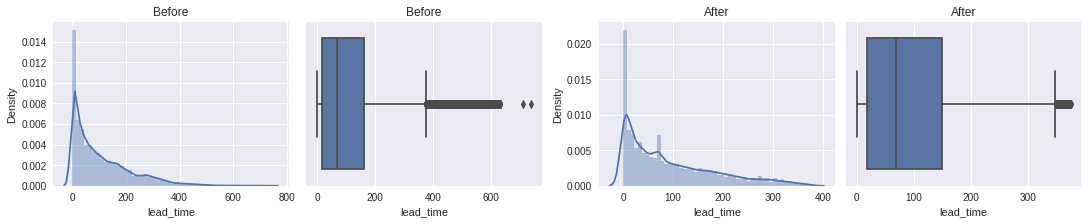

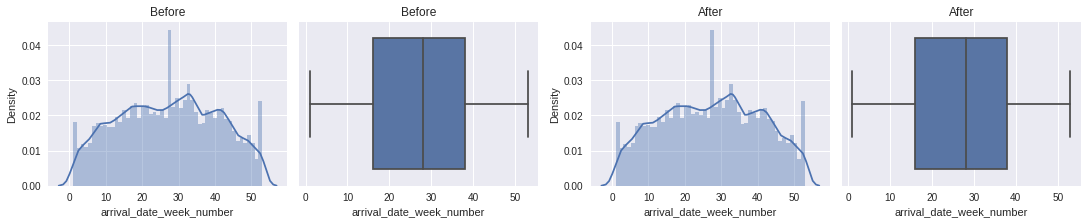

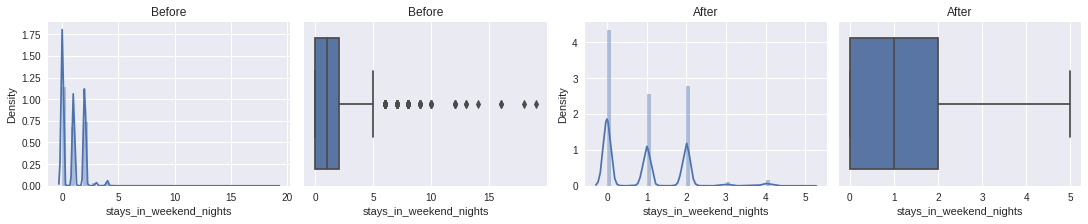

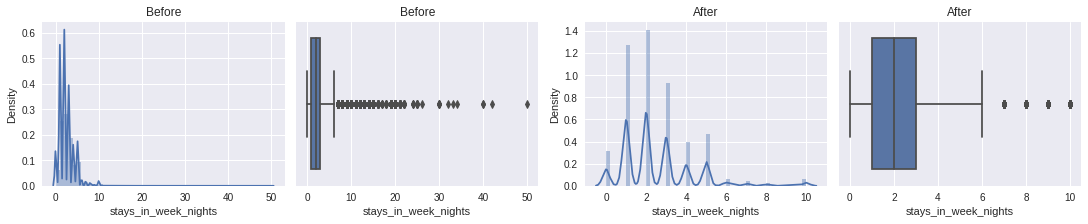

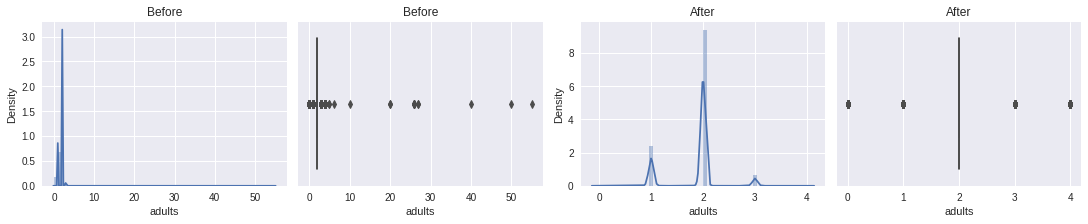

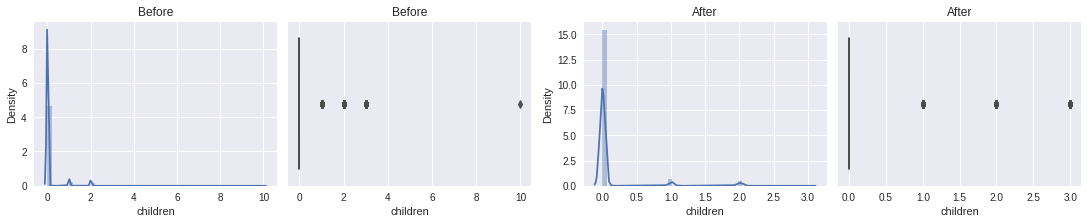

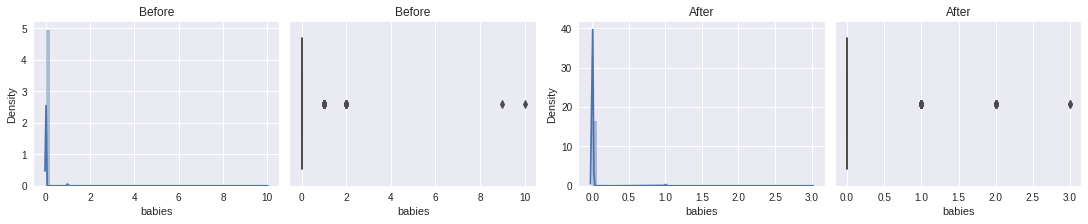

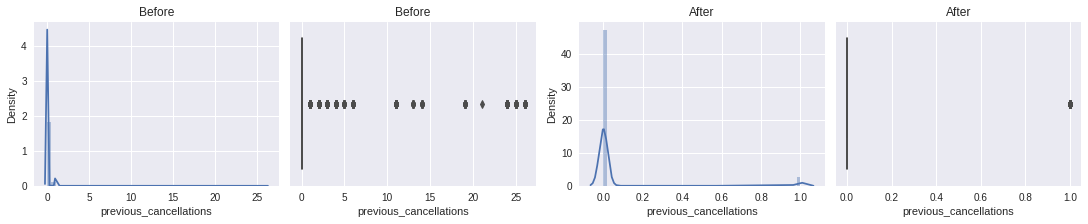

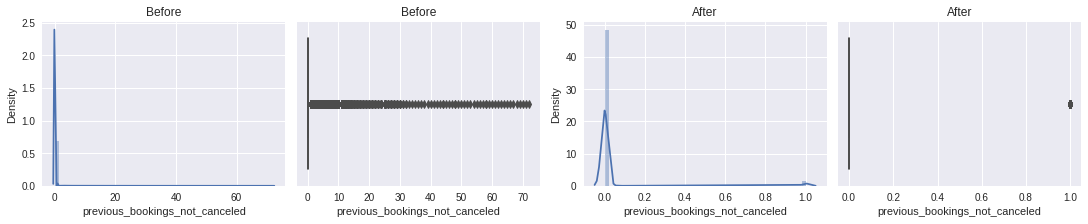

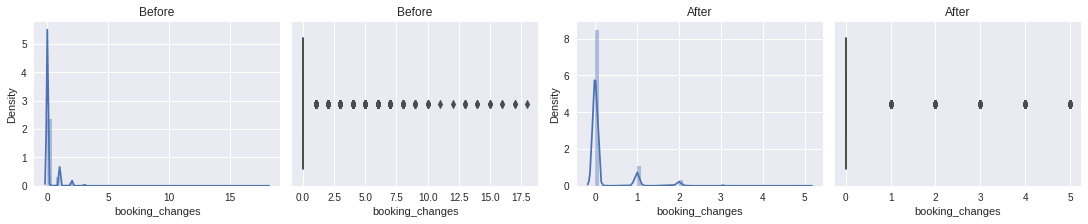

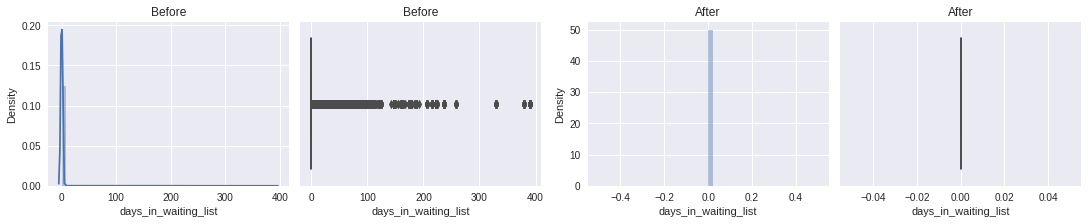

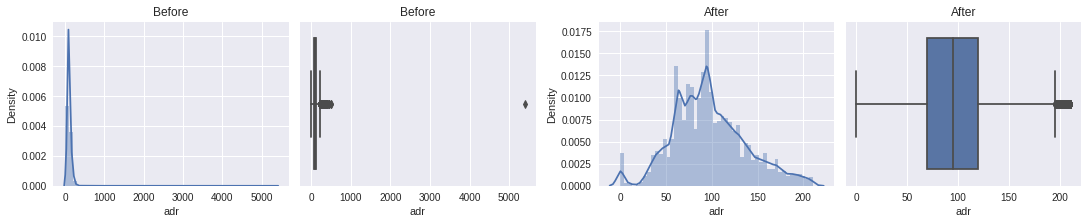

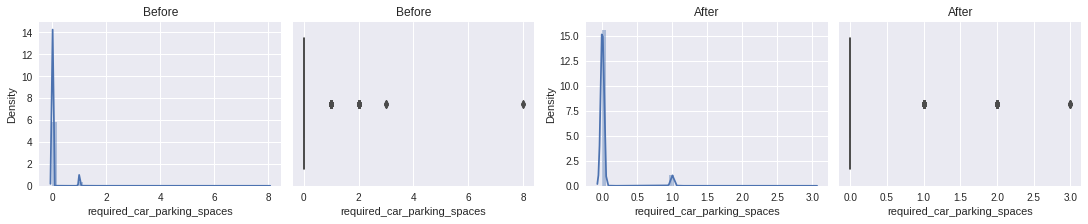

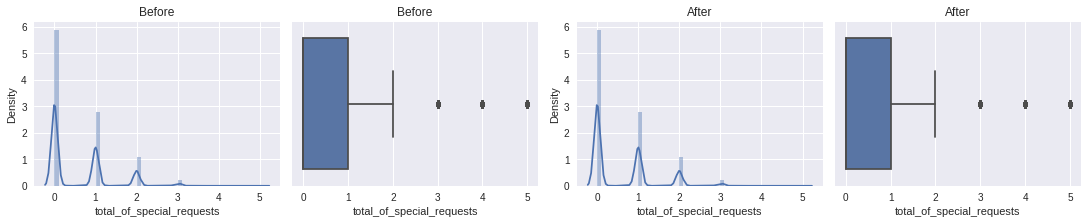

In [110]:
#Plotting Graphs Before treating outliers 
for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df[col], ax=ax[1]).set(title="Before")
  
  # After treating outliers
  sns.distplot(new_df[col], ax=ax[2]).set(title="After")
  sns.boxplot(new_df[col], ax=ax[3]).set(title="After")
  fig.show()

##**Cleaning and Manipulating dataset**

In [111]:
# Checking duplicates
print(len(new_df[new_df.duplicated()]))

32052


In [112]:
# Removing duplicates
new_df.drop_duplicates(inplace=True)

# Checking Shape after removing duplicates
new_df.shape

(87158, 31)

In [113]:
# Converting the datatype of relevant columns from float to integer
df[['children', 'agent','adr']] = df[['children', 'agent','adr']].astype('int64')

In [114]:
#creating some new features
new_df['same_room'] = np.where(new_df['reserved_room_type']==new_df['assigned_room_type'], 'yes', 'no')
new_df['total_children'] = new_df['children'] + new_df['babies']
new_df['total_members'] = new_df['total_children'] + new_df['adults']
new_df["total_nights"] = new_df['stays_in_weekend_nights'] + new_df['stays_in_week_nights']
new_df['guest_type']= np.where(new_df['total_members']==1,'single',np.where(new_df['total_members']==2,'couple','family'))

In [115]:
# dropping the columns since we merged both the columns as total_children
new_df.drop(['children','babies','previous_bookings_not_canceled'],axis = 1,inplace=True)

In [116]:
# Making a list of features where number of unique values <= 2
boolean_features = [i for i in new_df.columns if len(new_df[i].value_counts()) <= 2]

# Converting boolean columns from int to object
new_df[boolean_features] = new_df[boolean_features].replace([0,1],['no','yes'])

In [117]:
# Treating arrival_date_month column for better plot
new_df['arrival_date_month'] = new_df['arrival_date_month'].replace(
                                  {'July': 'Jul', 'August': 'Aug', 'September': 'Sep',
                                  'October': 'Oct', 'November': 'Nov','December': 'Dec',
                                  'January': 'Jan', 'February': 'Feb', 'March': 'Mar',
                                  'April': 'Apr', 'May': 'May', 'June': 'Jun'})

In [118]:
# Creating a dataframe by slicing the original df where bookings were not cancelled
df_not_cancelled = new_df[new_df['is_canceled'] == 'no']

In [119]:
# New look
new_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,same_room,total_children,total_members,total_nights,guest_type
0,Resort Hotel,no,342.0,2015,Jul,27,1,0,0,2,BB,PRT,Direct,Direct,no,no,C,C,3,No Deposit,0.0,no,Transient,0.0,0,0,Check-Out,2015-07-01,yes,0.0,2.0,0,couple
1,Resort Hotel,no,69.0,2015,Jul,27,1,0,0,2,BB,PRT,Direct,Direct,no,no,C,C,4,No Deposit,0.0,no,Transient,0.0,0,0,Check-Out,2015-07-01,yes,0.0,2.0,0,couple
2,Resort Hotel,no,7.0,2015,Jul,27,1,0,1,1,BB,GBR,Direct,Direct,no,no,A,C,0,No Deposit,0.0,no,Transient,75.0,0,0,Check-Out,2015-07-02,no,0.0,1.0,1,single
3,Resort Hotel,no,13.0,2015,Jul,27,1,0,1,1,BB,GBR,Corporate,Corporate,no,no,A,A,0,No Deposit,304.0,no,Transient,75.0,0,0,Check-Out,2015-07-02,yes,0.0,1.0,1,single
4,Resort Hotel,no,14.0,2015,Jul,27,1,0,2,2,BB,GBR,Online TA,TA/TO,no,no,A,A,0,No Deposit,240.0,no,Transient,98.0,0,1,Check-Out,2015-07-03,yes,0.0,2.0,2,couple


# Exploratory Data Analysis

In [120]:
hotel_df = df.copy()

In [121]:
#to drop the row where the booking is canceled
confirm_booking_df = df[df['is_canceled']==0]

In [122]:
#to write the function to count the values
def get_value_count(column,limit=None):

  if limit == None:
    x=column.value_counts()
  else:
    x=column.value_counts()[:limit]

  return x

In [123]:
#to write a function to plot a graph
def plot(x,y,chart=None,x_lable=None,y_lable=None,tittle=None,background=None):
  
  if chart == None:
      plt.plot(x,y)
  if chart == 'bar':
      plt.bar(x,y)
  if chart == 'pie':
      plt.pie(x,y)
  # if chart == None:
  #     plt.plot(x,y)


  if x_lable != None:
    plt.xlabel(x_lable)
  if y_lable != None:
    plt.ylabel(y_lable)
  if tittle != None:
    plt.title(tittle)
  if background != None:
    plt.style.use(background)
  plt.show()

##Comparing city hotel and resort hotel

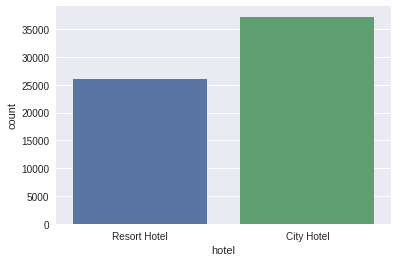

In [124]:
import seaborn as sns
sns.countplot(df_not_cancelled['hotel'])

##Booking cancellation ratio or Checking booking data

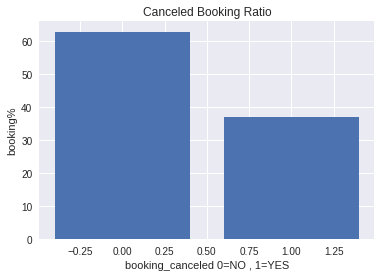

In [125]:
canceled_booking_ratio = get_value_count(hotel_df['is_canceled'])
canceled_booking_ratio = canceled_booking_ratio.reset_index()
canceled_booking_ratio['percent'] = canceled_booking_ratio['is_canceled'] * 100 / hotel_df['hotel'].count()

# sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_cancelled)
# canceled_booking_ratio['percent'].plot(kind='bar').figsize=(7,5)

plot(canceled_booking_ratio['index'],canceled_booking_ratio['percent'],'bar','booking_canceled 0=NO , 1=YES','booking%','Canceled Booking Ratio','dark_background')

##checking country origin

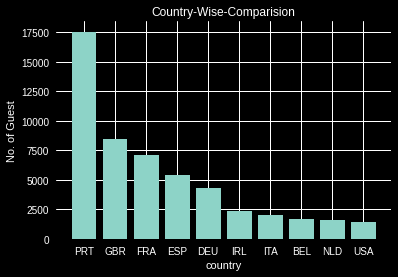

In [126]:
# most guest comming from which country

guest_from_country=get_value_count(df_not_cancelled['country'],limit=10).reset_index()
guest_from_country
plot(guest_from_country['index'],guest_from_country['country'],'bar','country','No. of Guest','Country-Wise-Comparision','fast')

##Checking Year Wise Comparison of the Bookings

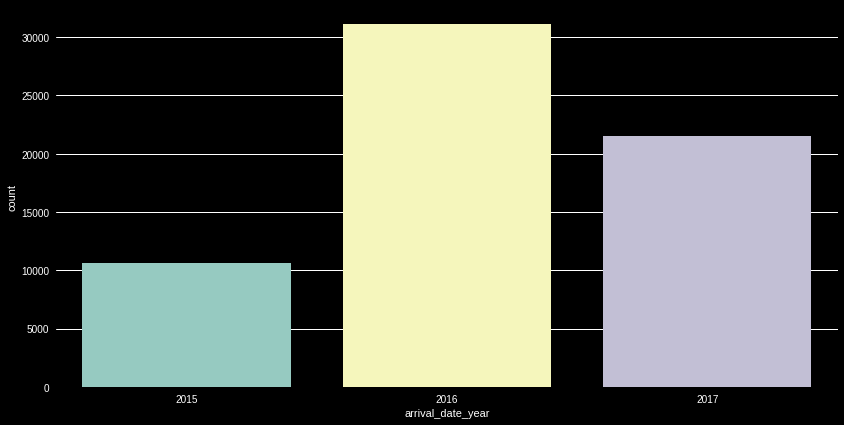

In [127]:
plt.figure(figsize=(14,7))
sns.countplot(df_not_cancelled['arrival_date_year'])

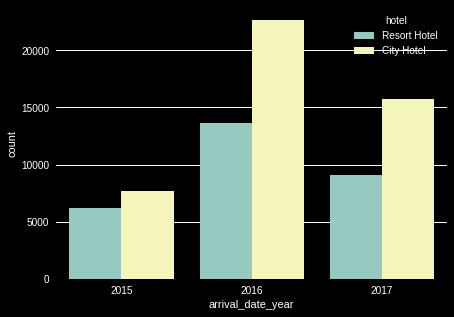

In [128]:
#according to hotel
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=confirm_booking_df);

## Checking Month wise Comparison of Bookings

In [129]:
#to make df of booking as per month
month_wise_booking = get_value_count (df_not_cancelled['arrival_date_month']).reset_index()
month_wise_booking.columns=['arrival_date_month','total_count']
month_wise_booking

,arrival_date_month,total_count
0,Aug,7610
1,Jul,6845
2,May,5897
3,Mar,5656
4,Apr,5491
5,Jun,5402
6,Oct,5276
7,Sep,5036
8,Feb,4666
9,Nov,3917


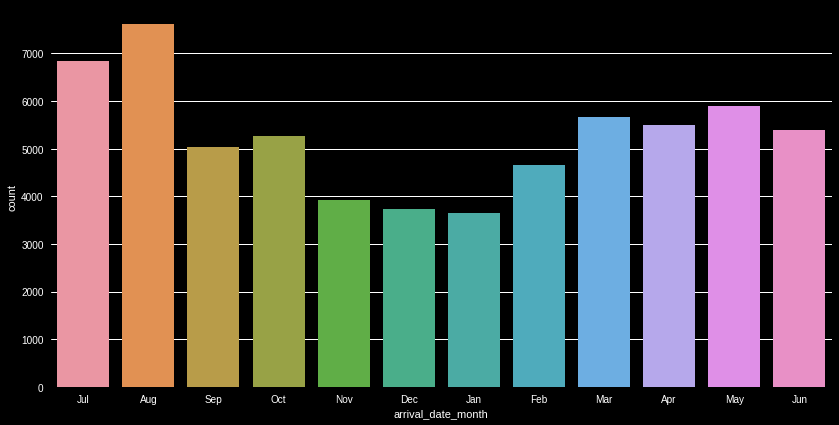

In [130]:
plt.figure(figsize=(14,7))
sns.countplot(df_not_cancelled['arrival_date_month'])

In [131]:
#to make df of booking as per month according to type of hotel
#1st for resort hotel
Resort_Hotel = df_not_cancelled[df_not_cancelled['hotel']=='Resort Hotel']
Resort_Hotel = get_value_count(Resort_Hotel['arrival_date_month']).reset_index()

#2nd for city hotel
City_Hotel = df_not_cancelled[df_not_cancelled['hotel']=='City Hotel']
City_Hotel = get_value_count(City_Hotel['arrival_date_month']).reset_index()

#now to merge the both hotel df
final_hotel_df = pd.merge(Resort_Hotel,City_Hotel,on='index')
final_hotel_df.columns = ['month','bookin_in_resort','booking_in_city']

final_hotel_df

,month,bookin_in_resort,booking_in_city
0,Aug,3144,4466
1,Jul,3011,3834
2,May,2244,3653
3,Oct,2209,3067
4,Mar,2189,3467
5,Apr,2166,3325
6,Feb,2049,2617
7,Jun,1925,3477
8,Sep,1875,3161
9,Nov,1741,2176


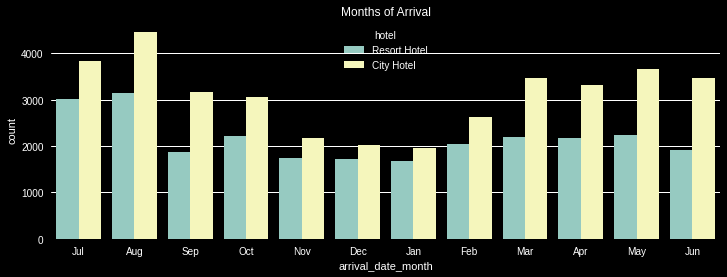

In [132]:
plt.figure(figsize=(12,4))
sns.countplot(x='arrival_date_month', hue = 'hotel', data= df_not_cancelled)
plt.title('Months of Arrival')
plt.show()

##Checking most prefered room

In [133]:
#most preffered room
type_of_room_preffered=get_value_count(hotel_df['reserved_room_type']).reset_index()
type_of_room_preffered.columns=['reserved_room_type','counts']
type_of_room_preffered

,reserved_room_type,counts
0,A,85873
1,D,19179
2,E,6519
3,F,2894
4,G,2092
5,B,1115
6,C,931
7,H,601
8,L,6


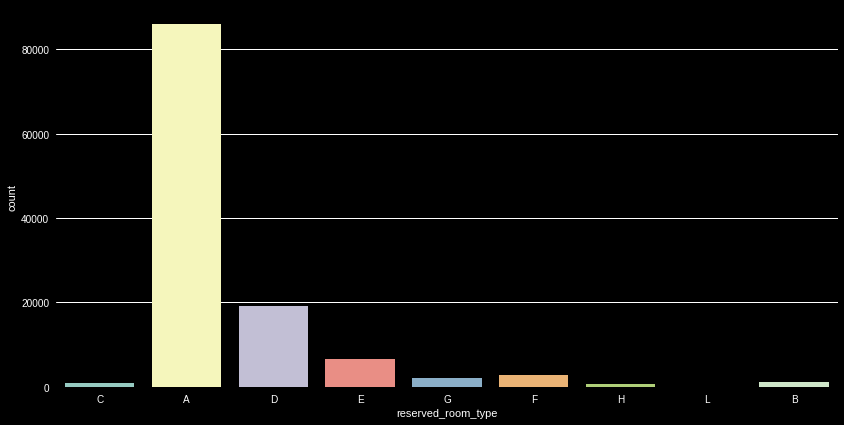

In [134]:
plt.figure(figsize=(14,7))
sns.countplot(hotel_df['reserved_room_type'])

## checking how many percent of customer assigned same room they demanded

In [135]:
guest_satisfied = df_not_cancelled[df_not_cancelled['reserved_room_type'] == df_not_cancelled['assigned_room_type']]
guest_not_satisfied = df_not_cancelled[df_not_cancelled['reserved_room_type'] != df_not_cancelled['assigned_room_type']]
x = get_value_count(guest_satisfied['reserved_room_type']).reset_index()
y = get_value_count(guest_not_satisfied['reserved_room_type']).reset_index()

#to merge the to data frame
final_df=pd.merge(x,y,on='index')
final_df.columns=['room_type','satisfied_guest','unsatisfied_guest']
final_df['total_no_of_booking']=final_df['satisfied_guest'] + final_df['unsatisfied_guest']



final_df

,room_type,satisfied_guest,unsatisfied_guest,total_no_of_booking
0,A,31664,10053,41717
1,D,10798,1341,12139
2,E,3833,552,4385
3,F,1788,178,1966
4,G,1265,48,1313
5,C,571,45,616
6,B,557,122,679
7,H,336,17,353


##Checking ratio of the guest repeated to new guest

In [136]:
#ratio of the guest repeated to new guest
guest_df = hotel_df.loc[:,['hotel','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled']]
ratio_of_guest_repeated_to_new_guest = get_value_count(guest_df['is_repeated_guest']).reset_index()
ratio_of_guest_repeated_to_new_guest['percent'] = ratio_of_guest_repeated_to_new_guest['is_repeated_guest'] * 100 / hotel_df['hotel'].count()
ratio_of_guest_repeated_to_new_guest

,index,is_repeated_guest,percent
0,0,115455,96.850096
1,1,3755,3.149904


In [137]:
#checking booking data
b=guest_df.groupby('hotel')['is_repeated_guest','previous_cancellations','previous_bookings_not_canceled'].sum()
b['total_bookings']=b['previous_cancellations'] +b ['previous_bookings_not_canceled']

b['previous_cancellations_percent']=b['previous_cancellations']*100/b['total_bookings']
b['previous_booking_percent']=b['previous_bookings_not_canceled']*100/b['total_bookings']
b

,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,total_bookings,previous_cancellations_percent,previous_booking_percent
hotel,,,,,,
City Hotel,1977,6319,10476,16795,37.624293,62.375707
Resort Hotel,1778,4075,5867,9942,40.987729,59.012271


##checking what type of guest come

In [138]:
#to find percentage of what categorial guest come 
type_of_guest = df_not_cancelled.loc[:,['hotel','adults','total_children','total_members']]
single_guest = type_of_guest[type_of_guest['total_members']==1]
x  =  single_guest['hotel'].count()

couple_guest  =type_of_guest[type_of_guest['total_members']==2]
y  =couple_guest['hotel'].count()

family_guest = type_of_guest[type_of_guest['total_members']>2]
z  =  family_guest['hotel'].count()

count_percent=pd.DataFrame([x,y,z],index = ['single','couple','family'],columns=['accommodation type']).reset_index()
count_percent['total_percent_booking'] = count_percent['accommodation type']  *  100  /  df_not_cancelled['hotel'].count()
count_percent.columns = ['accommodation_type','no_of_guest','total_percent_booking']
count_percent

,accommodation_type,no_of_guest,total_percent_booking
0,single,12947,20.494839
1,couple,40943,64.811942
2,family,9282,14.693219


##Checking market segment

In [139]:
#mode of booking
booking_mode  = get_value_count(hotel_df['market_segment']).reset_index()
booking_mode.columns = ['market_segment','total_bookings']

no_of_cancellation = hotel_df[hotel_df['is_canceled']==1]

booking_mode_of_canceled = get_value_count(no_of_cancellation['market_segment']).reset_index()
booking_mode_of_canceled.columns = ['market_segment','booking_canceled']

mode_of_reservations = pd.merge(booking_mode,booking_mode_of_canceled,on='market_segment')
mode_of_reservations['percent_'] = (mode_of_reservations['booking_canceled'] / mode_of_reservations['total_bookings']) *100

mode_of_reservations

,market_segment,total_bookings,booking_canceled,percent_
0,Online TA,56408,20735,36.758970
1,Offline TA/TO,24182,8302,34.331321
2,Groups,19791,12094,61.108585
3,Direct,12582,1934,15.371165
4,Corporate,5282,991,18.761833
5,Complementary,728,89,12.225275
6,Aviation,235,52,22.127660
7,Undefined,2,2,100.000000


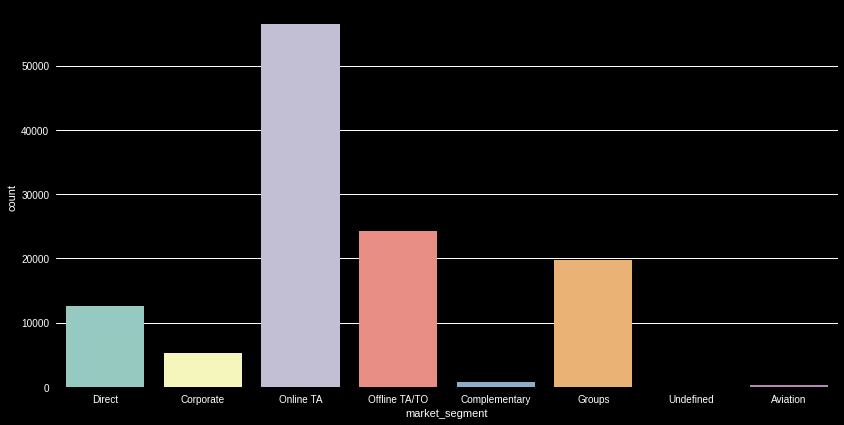

In [140]:
plt.figure(figsize=(14,7))
sns.countplot(hotel_df['market_segment'])

##**Univariate Analysis**

In [141]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


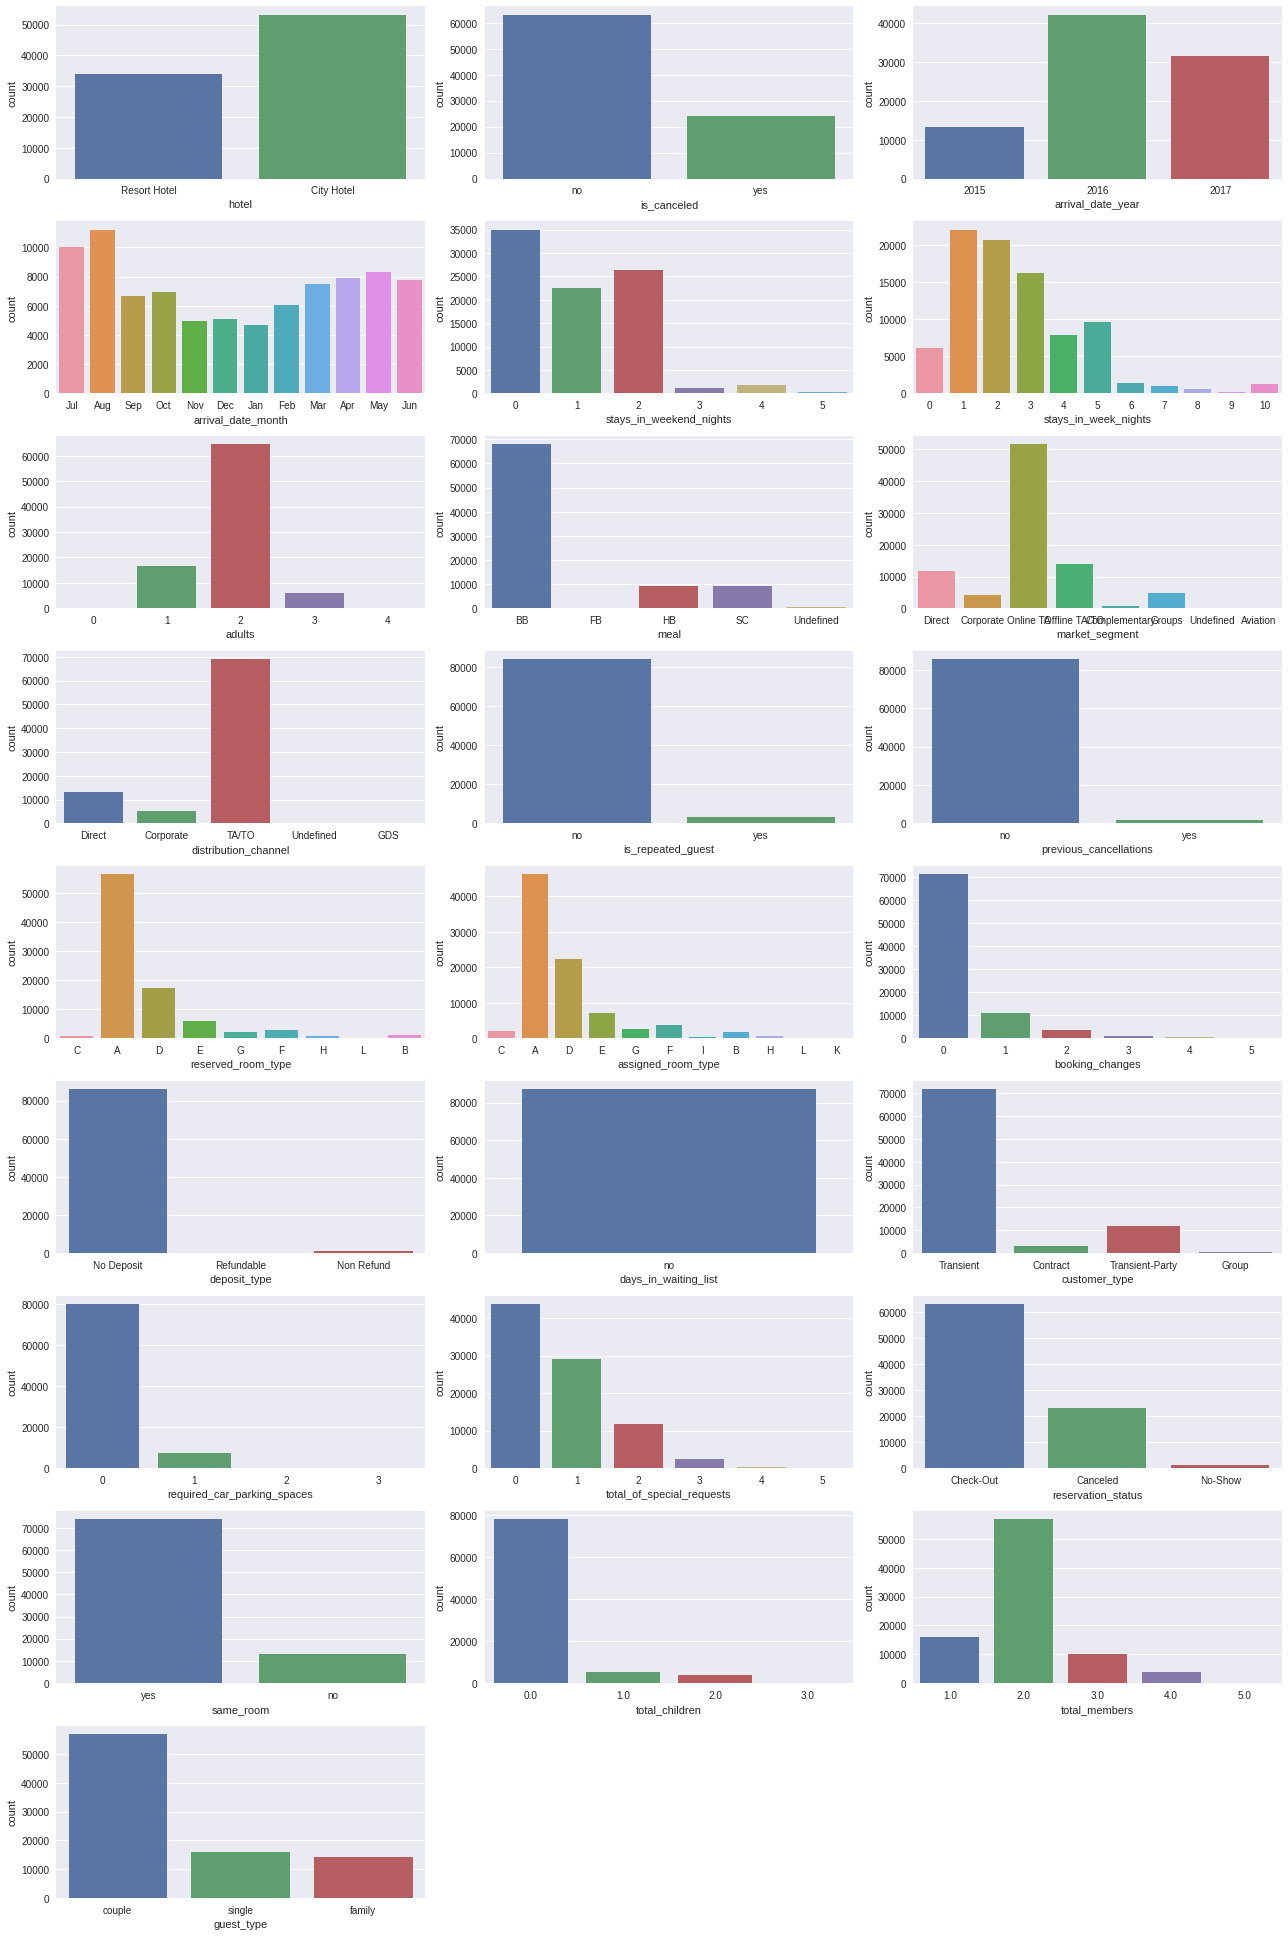

In [145]:
# Univariate Analysis
exclude = [i for i in new_df.columns if len(new_df[i].value_counts()) > 15]
target = [i for i in new_df.columns if i not in exclude]
n,r = 1,np.ceil(len(target)/3)
plt.figure(figsize=(18,r*3))
for column in target:
  plt.subplot(r,3,n)
  n = n+1
  sns.countplot(new_df[column])
  plt.style.use('seaborn')
  plt.tight_layout()


##**Hotelwise Analysis**

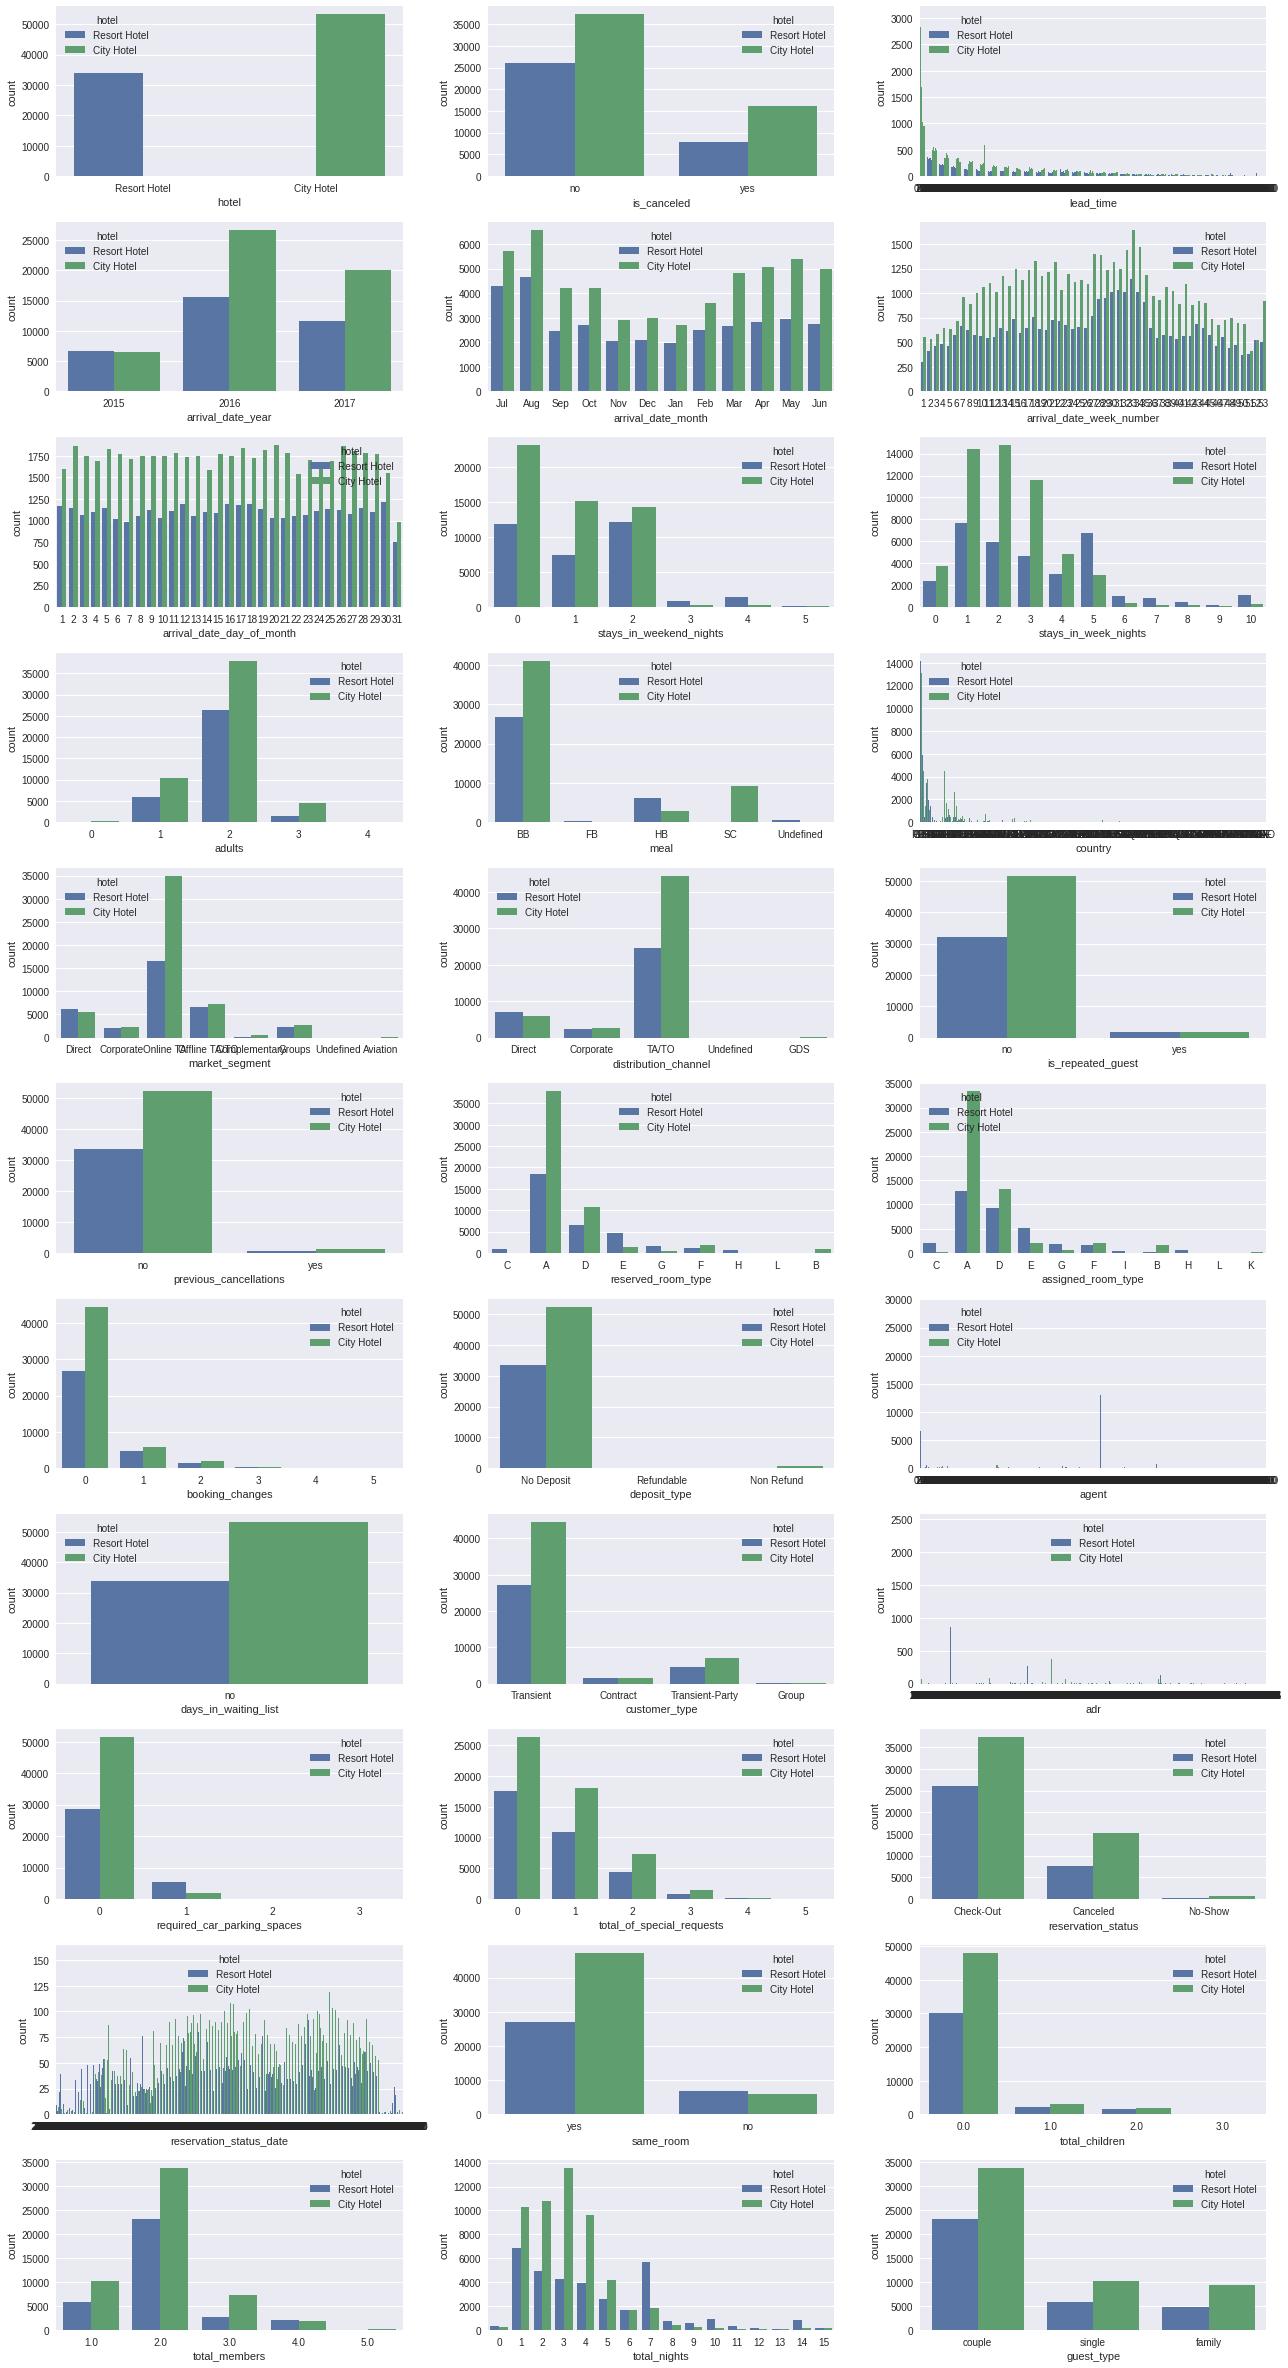

In [147]:
# Hotelwise Comparative Analysis
n,r = 1,np.ceil(len(new_df.columns)/3)
plt.figure(figsize=(18,r*3))
for column in new_df.columns:
  plt.subplot(r,3,n)
  n = n+1
  sns.countplot(new_df[column],x= column, hue=new_df['hotel'])
  # plt.style.use('seaborn')
  plt.tight_layout()

##**Bivariate Analysis**

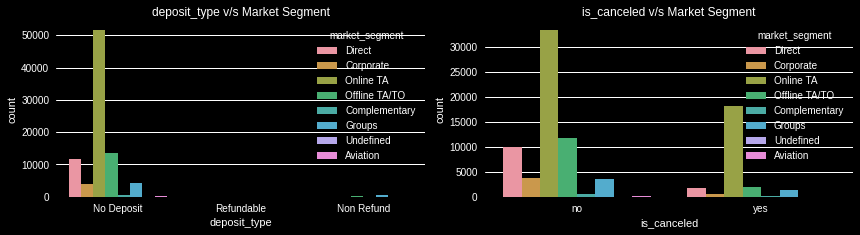

In [143]:
# Market Segment wise analysis
n = 1
plt.figure(figsize=(18,33))
for column in ['deposit_type','is_canceled']:
  plt.subplot(11,3,n)
  n = n+1
  sns.countplot(data=new_df,x= column, hue='market_segment')
  plt.title(f'{column} v/s Market Segment')
  plt.tight_layout()

## **Multivariate Analysis**

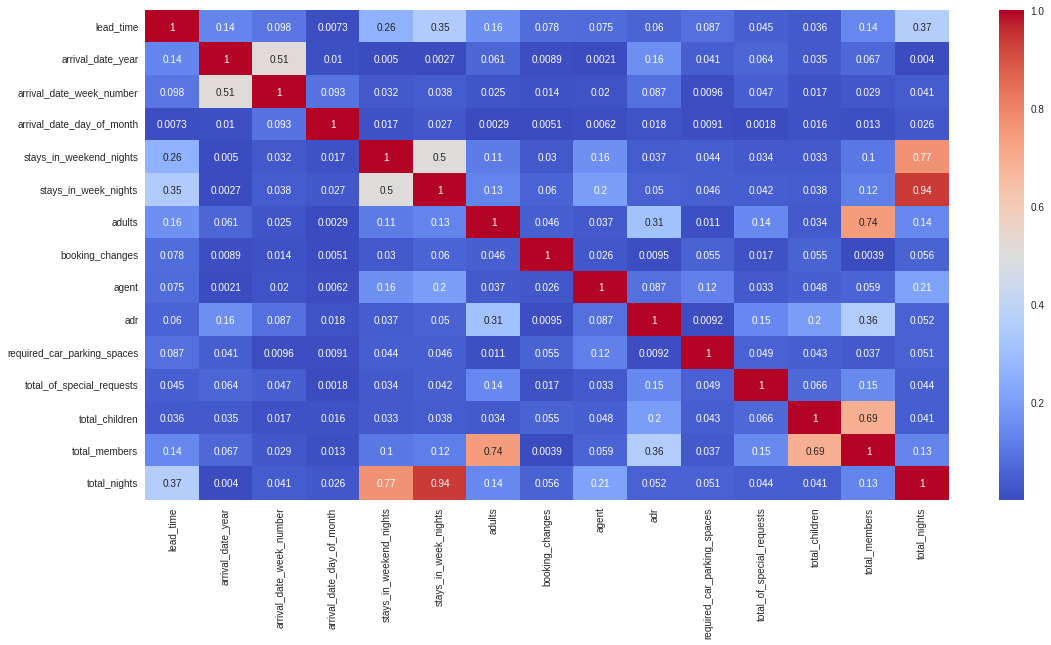

In [93]:
# Correlation Analysis
plt.figure(figsize=(18,9))
sns.heatmap(abs(new_df.corr()), annot=True, cmap='coolwarm')